In [1]:
# gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn import preprocessing
#Uyarıları kapatılıyor
warnings.filterwarnings("ignore")
print("Uyarılar kapatıldı")

Uyarılar kapatıldı


In [2]:
# veri seti okunuyor
df=pd.read_csv("Final-data.csv")

In [3]:
# veri seti 
df

,a1,a2,a3,a4,a5,a6,a7,a8,a9
0,1.5210,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.5176,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.5162,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.5177,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.5174,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.5162,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.5169,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.5207,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.5165,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [4]:
#veri setimizde eksik veri var mı?
#veri setimizin dytpeları ne ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      214 non-null    float64
 1   a2      214 non-null    float64
 2   a3      214 non-null    float64
 3   a4      214 non-null    float64
 4   a5      214 non-null    float64
 5   a6      214 non-null    float64
 6   a7      214 non-null    float64
 7   a8      214 non-null    float64
 8   a9      214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [5]:
#veri setimizde normalizason işlemi yapıyoruz
df1=preprocessing.minmax_scale(df)

In [6]:
#veri setimizin boyutu
df.shape 

(214, 9)

In [7]:
#kümeleme için küme sayısı belirleniyor
k=int(input('Bölünecek küme sayısını giriniz:'))

Bölünecek küme sayısını giriniz:2


In [8]:
#kümeleme işlemi gerçekleştirilip verilerin kümesini oluşturuyoruz.
#kümeleme işleminden snra wcss hesaplıyoruz.
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df1)
wcss=kmeans.inertia_

In [9]:
#kümeleme işlemi sonrası küme dağılımının gösterimi
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
#dunn indexi hesaplaması için kütüphane tanımı
from sklearn.metrics import davies_bouldin_score

In [11]:
#kümelerin dağılımını atıyoruz. 
labels = kmeans.labels_

In [12]:
#dunn indexini hesaplatıyoruz. 
dunn=davies_bouldin_score(df1, labels)

In [13]:
# küme dağılım sayısını öğrenmek için for döngüsüyle dağılımı hesaplıyoruz. 
ksifir=0
kbir=0
kiki=0
küc=0
kdört=0
kbes=0
kalti=0
kyedi=0
for i in range(214):
    if y_kmeans[i]==0:
        ksifir=ksifir+1
    if y_kmeans[i]==1:
        kbir=kbir+1
    if y_kmeans[i]==2:
        kiki=kiki+1
    if y_kmeans[i]==3:
        küc=küc+1
    if y_kmeans[i]==4:
        kdört=kdört+1
    if y_kmeans[i]==5:
        kbes=kbes+1
    if y_kmeans[i]==6:
        kalti=kalti+1
    if y_kmeans[i]==7:
        kyedi=kyedi+1

In [14]:
#dosya işlemleri
# dosya oluşturup içine w ile yazma işlemi yapıyoruz. 
#istenilen bilgiler eşliğinde yazma işlemini gerçekleştiriyoruz.
# her kayıtın karşısına kümesi gelecek şekilde for döngüsü ile işlem yapıyoruz. 
# ardından gerekli sonucları ekleyip  close() ile txt dosyamızı kapatıyoruz. 
dosya = open("sonuc.txt", "w")
for i in range(214):
    dosya.write("kayıt: "+str(i)+"  küme:"+str(y_kmeans[i])+"\n")
if ksifir!=0:
    dosya.write("küme 1 :"+str(ksifir)+" kayıt"+"\n")
if kbir!=0:
    dosya.write("küme 2 :"+str(kbir)+" kayıt"+"\n")
if kiki!=0:
    dosya.write("küme 3 :"+str(kiki)+" kayıt"+"\n")
if küc!=0:
    dosya.write("küme 4 :"+str(küc)+" kayıt"+"\n")
if kdört!=0:
    dosya.write("küme 5 :"+str(kdört)+" kayıt"+"\n")
if kbes!=0:
    dosya.write("küme 5 :"+str(kbes)+" kayıt"+"\n")
if kalti!=0:
    dosya.write("küme 6 :"+str(kalti)+" kayıt"+"\n")
if kyedi!=0:
    dosya.write("küme 7 :"+str(kyedi)+" kayıt"+"\n")

dosya.write("WCSS:"+str(wcss)+"\n")
dosya.write("Dunn Index:"+str(dunn)+"\n")
dosya.close()

In [15]:
#grafik için kullanıcıdan parametre istiyoruz. 
özellik1=input("birinci özelliği seçiniz (“a1,a2,a3,a4,a5,a6,a7,a8,a9”):")
özellik2=input("ikinci özelliği seçiniz  (“a1,a2,a3,a4,a5,a6,a7,a8,a9”):")
özellik1=özellik1[1:]
özellik2=özellik2[1:]

birinci özelliği seçiniz (“a1,a2,a3,a4,a5,a6,a7,a8,a9”):a2
ikinci özelliği seçiniz  (“a1,a2,a3,a4,a5,a6,a7,a8,a9”):a9


In [16]:
#parametlerelerin sayısal değerleri
özellik1,özellik2

('2', '9')

Text(0, 0.5, 'a9')

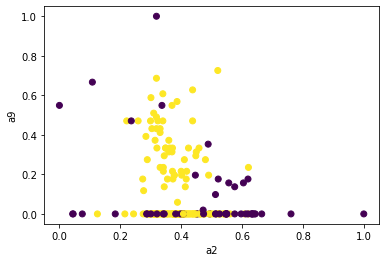

In [17]:
# istenilen özelliklere göre grafiğimizi oluşturuyoruz. 
plt.scatter(df1[:,int(özellik1)-1], df1[:,int(özellik2)-1], c=labels)
plt.xlabel("a"+özellik1)
plt.ylabel("a"+özellik2)